# Mohammad Sina Parvizi Motlagh - 810101394
Artificial Intelligence - CA2: **`Hidden Markov Models(HMM)`** - Spring 1403 \
Goal : The main goal in this project is to develop a number speech recognition and a speaker recognition system based on **`HMM`**.

## Problem Description
In this project, we should classify our model based on hidden markov model algorithm. We have 3000 audio files from 6 speakers called "george", "jackson", "lucas", "nicolas", "theo", "yweweler" which say numbers from 0 to 9. Each number is told by each speaker 50 times. We should train our model with a portion of data and then trained model should predicts test data. We should train our model in two ways: First, We have to predict the numbers. Second, We should predict the speaker's name. After that we analize our trained model performance based on these standards:
- *`Accuracy`*
- *`Precision`*
- *`Recall`*
- *`F1 Score`*

## Preprocessing and Feature Extraction

### 1. Data Segmentation
Speech segmentation is the process of identifying the boundaries between words, syllables, or phonemes in spoken natural languages. The term applies both to the mental processes used by humans, and to artificial processes of natural language processing. \
Audio segmentation is the process of dividing an audio signal into meaningful segments based on various acoustic characteristics. These characteristics can include pitch, timbre, energy, and rhythm, among others. The goal of audio segmentation is to identify boundaries between different sounds or events within an audio stream, effectively separating them into distinct segments. These segments can then be further analyzed or used for various applications.
- **`Do you think data segmentation is useful for this dataset? Why?`** Yes, data segmentation can be useful for this dataset. Segmentation helps in breaking down the audio signals into smaller, manageable parts. In speech recognition, segmenting the audio data into phonemes, words, or other meaningful units can aid in better feature extraction and modeling. It allows focusing on specific parts of the speech signal which might carry more relevant information for classification. However, our dataset is kind of dataset which we can call it as segmented dataset. We have audio files in which each speaker just tell one number. I mean it seems that the audios are segmented to segments of numbers or even speakers.

### 2. Feature Extraction and Relationships Between Features
Various features can be extracted from audio content, including MFCC, Rate Crossing Zero, mel-spectrogram, and chroma features. These features capture different aspects of the audio signal, such as spectral characteristics, temporal dynamics, and pitch.
At first lets see what is a **`signal`**. A signal is a variation in a certain quantity over time. For audio, the quantity that varies is air pressure. How do we capture this information digitally? We can take samples of the air pressure over time. The rate at which we sample the data can vary, but is most commonly 44.1kHz, or 44,100 samples per second.
- **`MFCC (Mel Frequency Cepstral Coefficients)`**: MFCCs are a compact representation of the spectrum(When a waveform is represented by a summation of possibly infinite number of sinusoids) of an audio signal. MFCC coefficients contain information about the rate changes in the different spectrum bands. If a cepstral coefficient has a positive value, the majority of the spectral energy is concentrated in the low-frequency regions. On the other hand, if a cepstral coefficient has a negative value, it represents that most of the spectral energy is concentrated at high frequencies.
- **`Zero Crossing Rate`**: Zero-crossing rate is a measure of number of times in a given time interval/frame that the amplitude of the speech signals passes through a value of zero. This feature has been used heavily in both speech recognition and music information retrieval, being a key feature to classify percussive sounds. It is also extensively used in a wide range of other audio application domains, such as musical genre classification, highlight detection, speech analysis, singing voice detection in music, and environmental sound recognition. The simplest method to distinguish between voiced and unvoiced speech is to analyze the zero crossing rate. A large number of zero crossings implies that there is no dominant low-frequency oscillation.
- **`Mel-Spectrogram`**: It is a representation of the power spectral density of a signal, computed over short, overlapping windows of the signal. The main difference between mel-spectrogram and MFCCs is that MFCCs further process the mel-spectrogram coefficients to capture the spectral characteristics of human speech more effectively. humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. For example, we can easily tell the difference between 500 and 1000 Hz, but we will hardly be able to tell a difference between 10,000 and 10,500 Hz, even though the distance between the two pairs are the same.
In 1937, Stevens, Volkmann, and Newmann proposed a unit of pitch such that equal distances in pitch sounded equally distant to the listener. This is called the mel scale. We perform a mathematical operation on frequencies to convert them to the mel scale. A mel spectrogram is a spectrogram where the frequencies are converted to the mel scale.
- **`Chroma Features`**:
In music, the term chroma feature or chromagram closely relates to the twelve different pitch classes. Chroma-based features, which are also referred to as “pitch class profiles”, are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale. One main property of chroma features is that they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation. Two of the main chroma features are listed below:
    - Chroma vector:
    A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).
    - Chroma deviation:
    The standard deviation of the 12 chroma coefficients.
<!-- These features capture the energy distribution across pitch classes, essentially representing the tonal content of the audio signal. They are useful for tasks like music genre classification and chord recognition. Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave. Since, in music, notes exactly one octave apart are perceived as particularly similar, knowing the distribution of chroma even without the absolute frequency (i.e. the original octave) can give useful musical information about the audio -- and may even reveal perceived musical similarity that is not apparent in the original spectra. -->

In summary, MFCCs are derived from the mel-spectrogram, which captures the spectral content of the audio signal. Zero Crossing Rate and Chroma Features capture other characteristics of the audio signal, such as periodicity and tonal content, respectively.

### 3. Check the robustness and sensitivity of MFCCs characteristics to changes in audio signals
MFCCs are generally robust to variations in audio signals caused by changes in speaker, background noise, and channel effects. However, they might be sensitive to changes in pitch and speaking rate, as these factors can affect the spectral characteristics of the speech signal. To assess the robustness of MFCCs, one can perform experiments by introducing various types of distortions or variations to the audio signals and observing the performance of the speech recognition system.

### 4. Are there specific cases where MFCC coefficients are less efficient?
MFCCs may be less efficient in scenarios where the assumptions underlying their computation are violated. For example, if the audio signal contains significant non-stationary noise or if the speaker exhibits unusual vocal characteristics (rapidly changing signals, such as transient sounds or sharp amplitude variations), MFCCs might not capture the relevant features effectively. Additionally, in cases where the signal is heavily reverberated or contains artifacts, MFCCs may not perform optimally.

### 5. Why do the frames used in MFCC calculation overlap with each other?
Overlapping frames are used in MFCC calculation to ensure that temporal information is preserved across adjacent frames. By overlapping frames, we can capture short-term variations in the signal that might otherwise be missed if we only considered non-overlapping frames. Overlapping frames also help in reducing artifacts at the boundaries of consecutive frames and improve the smoothness of the feature representation.

### 6. Why are 12 or 13 MFCC initial coefficients used in most projects related to sound?
The first 13(the lower dimensions) of MFCC represents the envelope of spectra. And the discarded higher dimensions expresses the specral details. For different phonemes, envelopes are enough to represent the difference, so we can recognize phonemes through MFCC.
Also MFCCs are a representation of the short-term power spectrum of a sound. The reason why we typically consider only the first 13 MFCCs is that they capture the most relevant information for speech recognition while discarding redundant information. Higher-order coefficients contain less discriminatory information and are more sensitive to noise, so they are often excluded to reduce computational complexity and improve the performance of speech processing systems.

In [5]:
import random
import numpy as np
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import pickle
import math
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import seaborn as sns

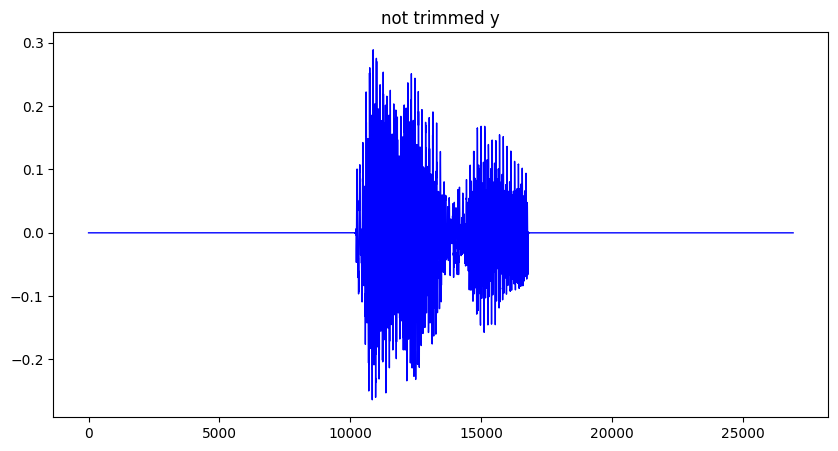

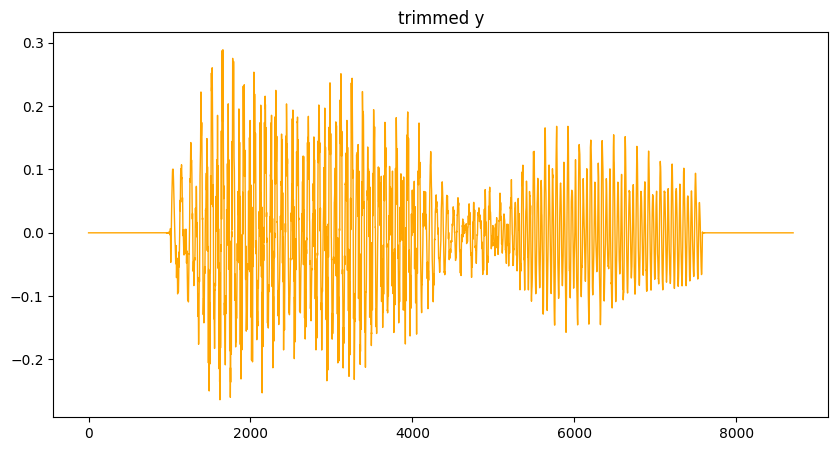

In [6]:
# just for test.
# I have to mention that I didn't trim or remove noise from dataset and I go on with raw data
import pandas as pd
y, sampling_rate = librosa.load("recordings/0_george_0.wav")
pd.Series(y).plot(figsize=(10, 5), lw=1, title="not trimmed y", color="blue")
plt.show()
y_trimmed, _ = librosa.effects.trim(y=y)
pd.Series(y_trimmed).plot(figsize=(10, 5), lw=1, title="trimmed y", color="orange")
plt.show()

mfcc = librosa.feature.mfcc(y=y, sr=sampling_rate, n_mfcc=13)

In [7]:
numbers_lists = {str(i): [] for i in range(10)}
numbers_lists_trans = {str(i): [] for i in range(10)}

def generate_mfcc_features():
    directory = "recordings"
    # mfcc_diagrams_directory = 'mfcc_diagrams'
    
    # if not os.path.exists(mfcc_diagrams_directory):
        # os.makedirs(mfcc_diagrams_directory)
        
    for filename in os.listdir(directory):
        folder_path = os.path.join(directory, filename)
        print(f"processing {folder_path}")
        ind = folder_path.find("\\")
        number = folder_path[ind+1]
        y, sampling_rate = librosa.load(folder_path)
        mfcc = librosa.feature.mfcc(y=y, sr=sampling_rate, n_mfcc=13)
        # mfcc /= np.amax(mfcc)
        mfcc_transpose = mfcc.T
        numbers_lists[str(number)].append(mfcc)
        numbers_lists_trans[str(number)].append(mfcc_transpose)
        # plt.figure(figsize=(10, 4))
        # librosa.display.specshow(mfcc, x_axis='time')
        # plt.colorbar(format="%+2.0f dB")
        # plt.title(f'MFCC Heatmap - {folder_path[ind+1:-4]}')
        # plt.xlabel('Time')
        # plt.ylabel('MFCC Coefficients')
        # plt.savefig(f"{mfcc_diagrams_directory}/mfcc_heatmap_{folder_path[ind+1:-4]}.png")
        # plt.close()

In [8]:
generate_mfcc_features()

processing recordings\0_george_0.wav
processing recordings\0_george_1.wav
processing recordings\0_george_10.wav
processing recordings\0_george_11.wav
processing recordings\0_george_12.wav
processing recordings\0_george_13.wav
processing recordings\0_george_14.wav
processing recordings\0_george_15.wav
processing recordings\0_george_16.wav
processing recordings\0_george_17.wav
processing recordings\0_george_18.wav
processing recordings\0_george_19.wav
processing recordings\0_george_2.wav
processing recordings\0_george_20.wav
processing recordings\0_george_21.wav
processing recordings\0_george_22.wav
processing recordings\0_george_23.wav
processing recordings\0_george_24.wav
processing recordings\0_george_25.wav
processing recordings\0_george_26.wav
processing recordings\0_george_27.wav
processing recordings\0_george_28.wav
processing recordings\0_george_29.wav
processing recordings\0_george_3.wav
processing recordings\0_george_30.wav
processing recordings\0_george_31.wav
processing recor

In [9]:
def draw_sample_mfcc(lst=numbers_lists):
    for num, mfcc_list in lst.items():
        mfcc = mfcc_list[0]
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"MFCC Heatmap - {num}")
        plt.show()

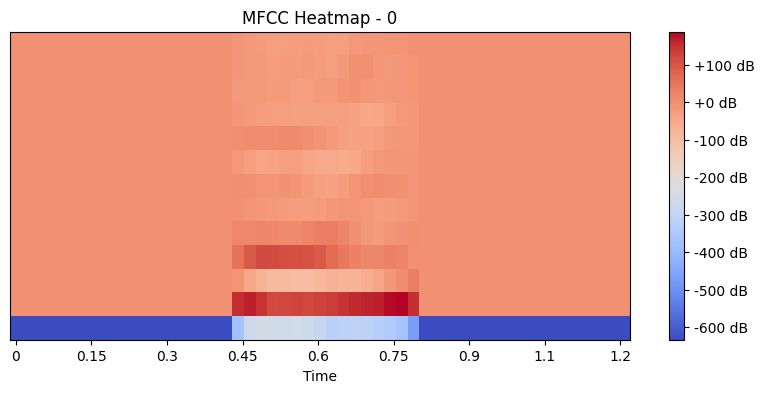

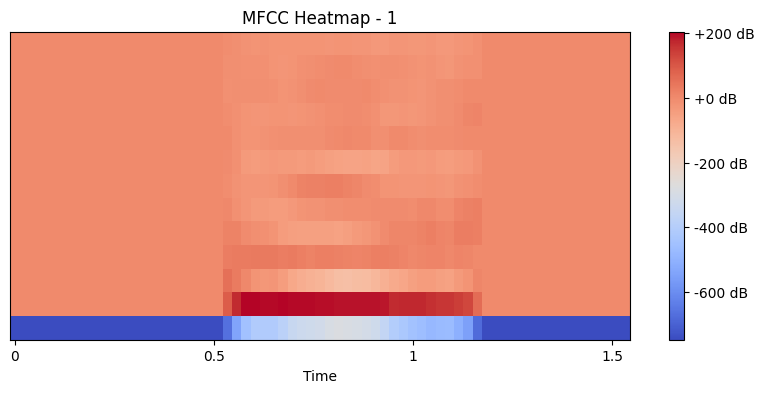

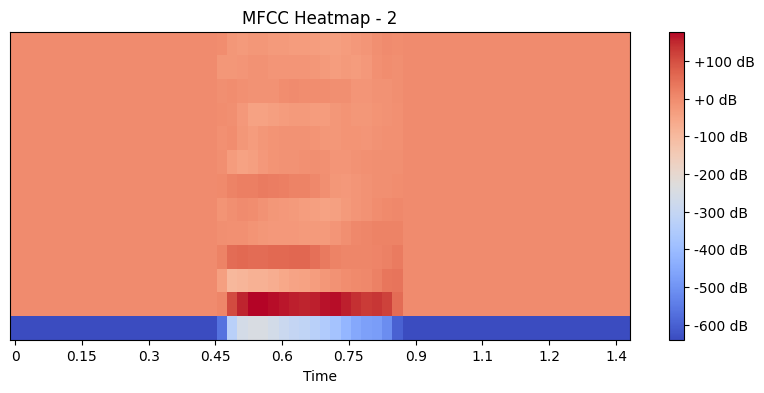

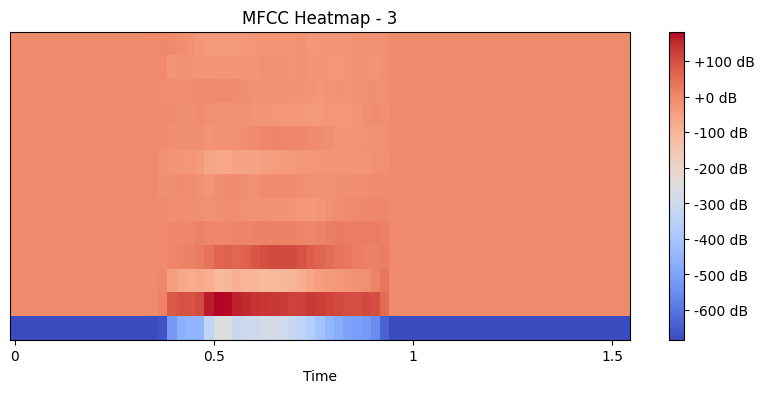

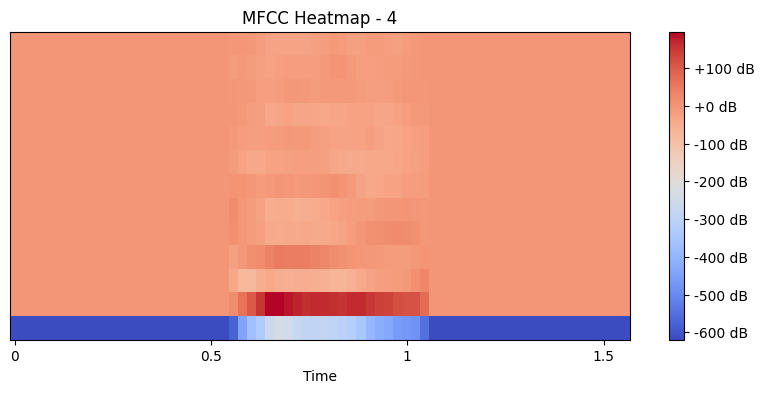

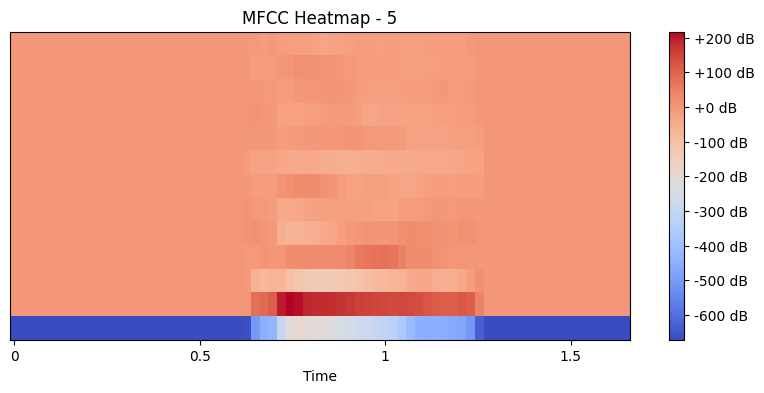

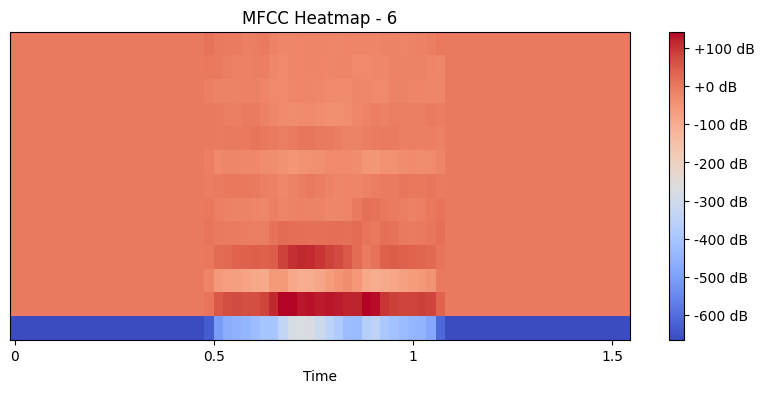

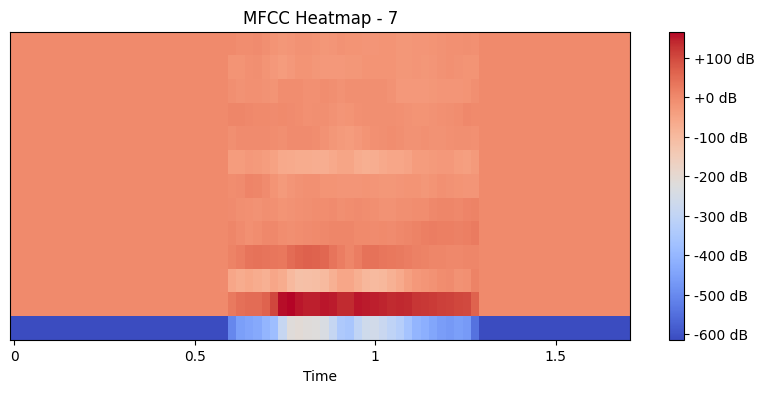

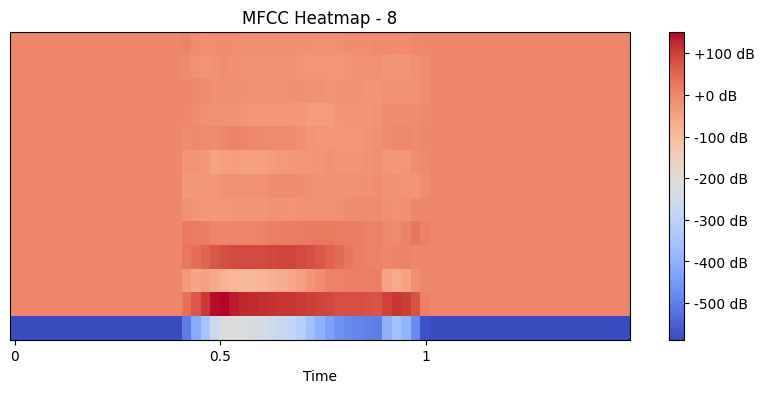

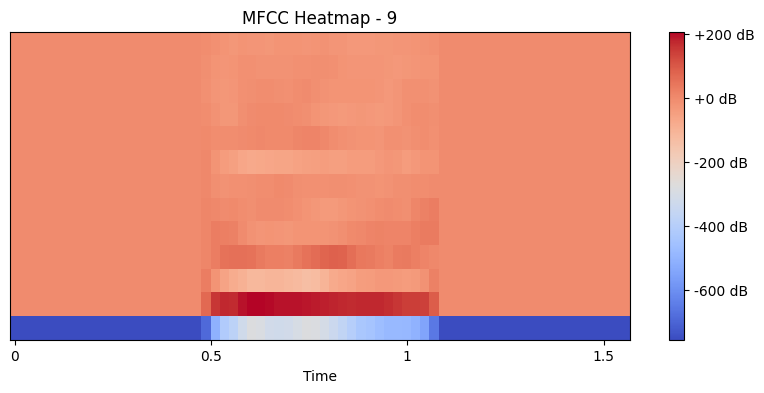

In [10]:
draw_sample_mfcc(numbers_lists)

## Introduction to HMM

### 1. Explain what is meant by States and Observation? In this exercise, what are the states and How is observation obtained?

**`States`**: In HMM, states represent the underlying, unobservable (hidden) variables that generate the observed data. Each state corresponds to a particular situation or condition in the system being modeled. In our project, In the context of number speech recognition, States are the numbers (0-9). So here, We have 10 states called 0, 1, ..., 9. In the context of speaker speech recognition, States are the speakers name. Here, There are 6 speakers. So, We have 6 states and the states are 'george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler'. \
**`Observations`**: Observations are the visible outcomes or measurements generated by the underlying states. They provide information about the current state of the system. In the context of number speech recognition, observations can be acoustic features extracted from the audio signals, such as MFCC coefficients and other features. In our project, In the context of number speech recognition and speaker speedh recognition, Observations are the MFCC features extracted from audio signals.

### Q2 HMM models can be classified based on the degree of dependence between hidden states, the model that you will implement in this exercise is a First-Order HMM model. Check the reason for its naming and Also, check its features and describe its difference from other models in this category.

A first-order Hidden Markov Model (HMM) is named as such because it represents a Markov chain where the state transitions depend only on the current state and not on any previous states. In other words, the next state in the sequence is directly determined by the current state, and there is no consideration of the history beyond the current state.

- Here are some features and differences of a first-order HMM compared to other models in this category:

    - **`Dependency on Previous States`**: First-order HMMs only consider the current state when determining the next state transition. This means that the probability distribution of the next state depends only on the current state and is independent of any previous states. This simplifies the model and makes it computationally efficient.
    
    - **`Markov Property`**: First-order HMMs satisfy the Markov property, which states that the future state depends only on the current state and not on the sequence of events leading up to the current state. This property allows for efficient inference algorithms, such as the forward-backward algorithm, to be used for training and decoding.
    
    - **`Transition Probabilities`**: It defines the probability of transitioning from one state (number or speaker in our case) to another. In a first-order model, these transition probabilities depend only on the previous state. For example, if the current state represents "0" the transition probabilities determine the likelihood of transitioning to another number like "1" or "2" and so on.
    
    - **`Emission Probabilities`**: These probabilities define the likelihood of observing specific features (audio descriptors) given the current state. In number speech recognition, emission probabilities represent the statistical distributions of audio features associated with each number. For instance, if the current state is "0", the emission probabilities inform how likely it is to observe certain acoustic characteristics, such as the voice of speakers telling something and so on.
    
    - **`Parameter Estimation`**: Estimating the parameters of a first-order HMM, such as the transition probabilities and emission probabilities, can be more straightforward compared to higher-order HMMs. This is because the model parameters are estimated based solely on the observations and the assumption of first-order dependence between states.
    
    - **`Memoryless Behavior`**: First-order HMMs exhibit memoryless behavior, where the future state transitions are determined solely by the current state. While this assumption simplifies the modeling process, it may not capture complex dependencies present in the data. Higher-order HMMs, such as second-order or higher, may be necessary to capture longer-range dependencies in the data.

- There are different variations of HMM models based on their level of complexity and the correlations considered between hidden states:

    - **`Discrete-State HMM`**: In a discrete-state HMM, the hidden states form a discrete set, meaning that each state represents a distinct category or class. Discrete-state HMMs are commonly used for modeling sequences where the underlying states are discrete, such as part-of-speech tagging in natural language processing.
    
    - **`Continuous-State HMM`**: In contrast to discrete-state HMMs, continuous-state HMMs have continuous hidden states. These models are often used when the underlying states represent continuous variables, such as physical quantities or sensor measurements.
    
    - **`Left-to-Right HMM`**: A left-to-right HMM is characterized by a topology where the state transition graph progresses from left to right, meaning that transitions occur only from lower-numbered states to higher-numbered states. Left-to-right HMMs are useful for modeling sequential data with a natural ordering, such as speech signals or genomic sequences.
    
    - **`Fully Connected HMM`**: In a fully connected HMM, every state is connected to every other state, allowing for transitions between any pair of states. Fully connected HMMs can capture complex dependencies between states but may require more parameters and computational resources compared to simpler topologies.
    
    - **`Ergodic HMM`**: An ergodic HMM, also known as a fully connected HMM, is characterized by a topology where transitions are allowed between any pair of states. Ergodic HMMs are useful for modeling sequences with arbitrary dependencies between states, but they may be challenging to train and interpret due to the large number of parameters.

In summary, a first-order HMM is characterized by its dependency on the current state only, satisfying the Markov property. It simplifies the modeling process and parameter estimation while providing an efficient representation of sequential data. However, it may not capture complex dependencies beyond the immediate state transition, which could be addressed by higher-order HMMs.

### Q3. Research about HMM and explain what phenomena this model is suitable for investigating and analyzing. Explain why this is the case.
Hidden Markov Models (HMMs) are versatile statistical models that find application in various fields due to their ability to model sequences of observations with underlying hidden states. Here are some phenomena and scenarios where HMMs are particularly suitable for investigation and analysis:

- **`Speech Recognition`**: One of the most well-known applications of HMMs is in speech recognition. In this context, speech signals are modeled as sequences of observations (acoustic features) generated by underlying phonetic states. HMMs can effectively capture the temporal dynamics of speech signals and accurately recognize spoken words or phonemes.

- **`Natural Language Processing (NLP)`**: HMMs are used in various NLP tasks such as part-of-speech tagging, named entity recognition, and syntactic parsing. In these tasks, words or tokens are modeled as observations emitted from hidden states representing grammatical categories or syntactic structures. HMMs help capture the sequential dependencies in language and improve the accuracy of linguistic analysis.

- **`Bioinformatics`**: HMMs are extensively used in bioinformatics for sequence analysis tasks such as gene finding, protein family classification, and sequence alignment. In these applications, biological sequences (DNA, RNA, or protein sequences) are modeled as sequences of observations emitted from hidden states representing biological motifs, domains, or structural elements. HMMs facilitate the identification of patterns and motifs in biological sequences and aid in understanding their functional and evolutionary significance.

- **`Time-Series Analysis`**: HMMs are suitable for analyzing time-series data in various domains, including finance, economics, and signal processing. In finance, for example, HMMs can model stock price movements as sequences of observations generated by hidden market states (e.g., bull market, bear market). Similarly, in signal processing, HMMs can be used to model and analyze temporal patterns in signals such as EEG signals, weather data, and sensor measurements.

- **`Robotics and Control Systems`**: HMMs find application in robotics and control systems for tasks such as environment modeling, state estimation, and behavior recognition. In robotics, HMMs can model the environment dynamics and infer the robot's location or map occupancy based on sensor observations. In control systems, HMMs can be used for fault detection, diagnosis, and predictive maintenance.

- **`Gesture Recognition`**: HMMs are employed in gesture recognition systems for interpreting human gestures captured by sensors or cameras. In this context, gestures are modeled as sequences of observations emitted from hidden states representing different gesture classes or movements. HMMs enable accurate recognition and interpretation of gestures in human-computer interaction applications.

Overall, HMMs are suitable for investigating and analyzing phenomena characterized by sequential data with hidden structures or states. Their flexibility, ability to model temporal dependencies, and robustness in handling noisy data make them valuable tools across a wide range of domains and applications.

### Q4.The HMM model, like any other model, has advantages and disadvantages that make it special. Examine Advantages and Disadvantages of this model and briefly explain each one.
Advantages:
1. **`Modeling Temporal Dynamics`**: HMMs are well-suited for modeling sequential data with temporal dependencies, where the current observation depends on the previous observations and hidden states. This makes them particularly useful for tasks involving time-series data, such as speech recognition, gesture recognition, and time-series prediction.

2. **`Flexible Representation`**: HMMs provide a flexible framework for representing complex probabilistic relationships between observed and hidden variables. They can capture a wide range of data distributions, including discrete and continuous observations, making them versatile for various types of data.

3. **`Probabilistic Inference`**: HMMs allow for probabilistic inference, enabling uncertainty quantification in model predictions. By computing the posterior probabilities of hidden states given observations (via the forward-backward algorithm), HMMs provide a principled way to incorporate uncertainty into decision-making processes.

4. **`Parameter Estimation`**: HMMs can be trained from data using algorithms such as the Baum-Welch algorithm (Expectation-Maximization), enabling automatic learning of model parameters from observed sequences. This makes HMMs suitable for tasks where labeled training data is available, such as in speech and language processing.

Disadvantages:
1. **`Sensitivity to Model Complexity`**: HMMs require specifying the number of hidden states and the topology of the state transition graph, which can be challenging. Selecting an appropriate model complexity is crucial, as overly complex models may lead to overfitting, while overly simple models may fail to capture the underlying data distribution adequately.

2. **`Assumption of Markov Property`**: HMMs assume the Markov property, which states that the current state depends only on the previous state. This assumption might not hold in all real-world scenarios, leading to limitations in modeling more complex dependencies.

3. **`Limited Modeling Power`**: HMMs have limited expressive power compared to more complex models such as deep learning architectures. They may struggle to capture highly nonlinear relationships or long-range dependencies in sequential data, limiting their performance in tasks requiring advanced pattern recognition capabilities.

### Q5.There are different types of HMM models, research them and briefly review a few.

Hidden Markov Models (HMMs) come in various forms, each with unique characteristics and applications. Here are a few different types of HMM models:

- **`First-Order HMMs`**: First-order HMMs, also known as first-order Markov models, are the most basic form of HMMs. They assume that the current hidden state depends only on the immediately preceding state. While simple, first-order HMMs are widely used in applications such as speech recognition, part-of-speech tagging, and bioinformatics.

- **`Higher-Order HMMs`**: Higher-order HMMs extend the first-order model by allowing dependencies on multiple preceding states. In these models, the current hidden state depends on the last k states, where k is the order of the model. Higher-order HMMs can capture more complex dependencies in sequential data but may require more parameters and training data.

- **`Left-to-Right HMM`**: In a left-to-right HMM, the model enforces a natural ordering of the hidden states. The transitions between states only occur from left to right, meaning that a state can transition to itself or to a state further to the right. This type of HMM is often used in speech recognition, where the sequence of phonemes follows a left-to-right structure.

- **`Continuous HMMs`**: Continuous HMMs relax the assumption of discrete observations and allow for continuous-valued observations. Instead of discrete symbols, observations are represented by continuous probability distributions, such as Gaussian distributions. Continuous HMMs are commonly used in speech recognition and signal processing tasks where observations are real-valued.

- **`Hidden Semi-Markov Models (HSMMs)`**: HSMMs generalize traditional HMMs by allowing states to have variable-duration dwell times. Unlike standard HMMs, where each state has a fixed duration, HSMMs can accommodate variable-length segments of observations. This flexibility makes HSMMs suitable for modeling complex temporal patterns in sequences with variable durations, such as speech and activity recognition.

- **`Switching HMMs`**: Switching HMMs are a type of hierarchical HMM that incorporates multiple underlying HMMs (sub-models) and switches between them based on some external control signal or latent variable. Switching HMMs are used in applications where the underlying data-generating process may switch between different modes or regimes over time, such as in financial time series analysis or behavioral modeling.

- **`Coupled HMMs`**: Coupled HMMs are used to model interactions between multiple sequences of observations. In these models, each sequence has its own set of hidden states, but the transitions of one sequence's states are influenced by the states of the other sequences. Coupled HMMs find applications in areas such as speech recognition with multiple input channels or multi-modal data fusion.

These are just a few examples of the different types of HMM models. Each type has its own advantages and is suited to different types of data and applications. The choice of HMM model depends on the specific characteristics of the data and the requirements of the task at hand.

## Part 1: Implementing With Libraries

#### Number Speech Recognition

In [56]:
NUMBERS_RANGE = 10
numbers = [str(i) for i in range(NUMBERS_RANGE)]

def train_hmm(ind, lst, hmm_models, test_list):
    X_train = np.array([])
    train, test = train_test_split(lst[ind] , test_size=0.2, shuffle = True)
    test_list[ind] = test
    model = hmm.GaussianHMM(n_components=6, covariance_type='diag', n_iter=10)
    
    for i in train:
        if len(X_train) == 0:
            X_train = i
        else:
            X_train = np.append(X_train, i, axis=0)
    
    model.fit(X_train)
    hmm_models[ind] = model

In [57]:
def evaluate_hmm(test, model):
    pred_labels = []
    for i in range(len(test)):
        max_score = -math.inf
        max_label = None
        for num in model:
            hmm_model = model[num]
            score = hmm_model.score(test[i])
            if(score > max_score):
                max_score = score
                max_label = num
        pred_labels.append(max_label)
    return pred_labels

In [58]:
hmm_models = {}
test_list = {}
for num in numbers:
    train_hmm(num, numbers_lists_trans, hmm_models, test_list)

In [59]:
hmm_models

{'0': GaussianHMM(n_components=6),
 '1': GaussianHMM(n_components=6),
 '2': GaussianHMM(n_components=6),
 '3': GaussianHMM(n_components=6),
 '4': GaussianHMM(n_components=6),
 '5': GaussianHMM(n_components=6),
 '6': GaussianHMM(n_components=6),
 '7': GaussianHMM(n_components=6),
 '8': GaussianHMM(n_components=6),
 '9': GaussianHMM(n_components=6)}

In [60]:
def make_confusion_matrix(test_lists, num_classes, true_labels, predicted_labels, cclass):
    for ind in cclass:
        test = test_lists[ind]
    
        predicted_labels.extend(evaluate_hmm(test, hmm_models))
        true_labels.extend([ind] * len(test))
        
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for pred_label, true_label in zip(predicted_labels, true_labels):
        cm[int(true_label)][int(pred_label)] += 1
    
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=cclass, yticklabels=cclass)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm

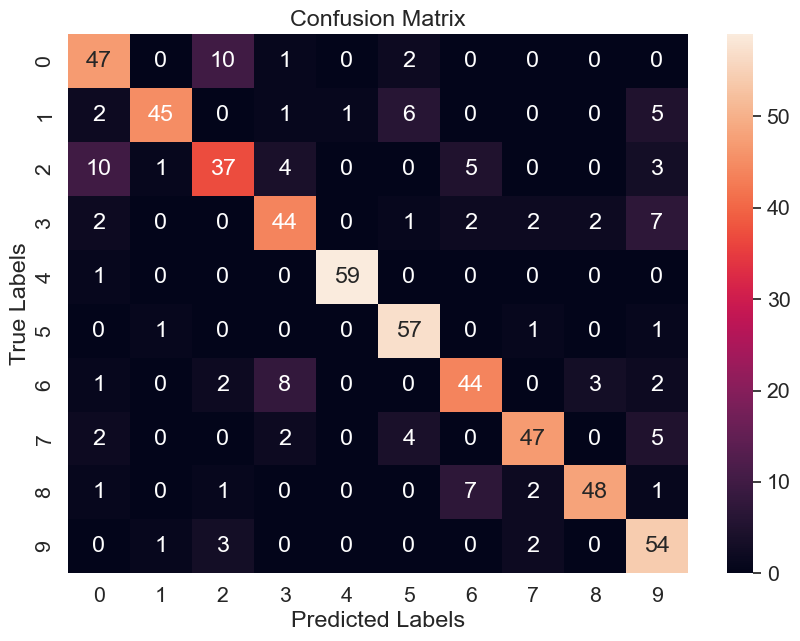

In [61]:
real_labels = []
predicted_labels = []
cm = make_confusion_matrix(test_list, 10, real_labels, predicted_labels, numbers)

In [62]:
def calculate_metrics(confusion_matrix):
    true_positives = np.diag(confusion_matrix)
    false_positives = np.sum(confusion_matrix, axis=0) - true_positives
    false_negatives = np.sum(confusion_matrix, axis=1) - true_positives
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    accuracy = np.sum(true_positives) / np.sum(confusion_matrix)
    
    return precision, recall, f1_score, accuracy

In [63]:
precision, recall, f1_score, accuracy = calculate_metrics(cm)

for i in range(len(precision)):
    print(f"Class {i}:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print()

print("Accuracy:", accuracy)

Class 0:
Precision: 0.7121212121212122
Recall: 0.7833333333333333
F1 Score: 0.746031746031746

Class 1:
Precision: 0.9375
Recall: 0.75
F1 Score: 0.8333333333333334

Class 2:
Precision: 0.6981132075471698
Recall: 0.6166666666666667
F1 Score: 0.6548672566371682

Class 3:
Precision: 0.7333333333333333
Recall: 0.7333333333333333
F1 Score: 0.7333333333333333

Class 4:
Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1 Score: 0.9833333333333333

Class 5:
Precision: 0.8142857142857143
Recall: 0.95
F1 Score: 0.8769230769230769

Class 6:
Precision: 0.7586206896551724
Recall: 0.7333333333333333
F1 Score: 0.7457627118644068

Class 7:
Precision: 0.8703703703703703
Recall: 0.7833333333333333
F1 Score: 0.8245614035087719

Class 8:
Precision: 0.9056603773584906
Recall: 0.8
F1 Score: 0.8495575221238938

Class 9:
Precision: 0.6923076923076923
Recall: 0.9
F1 Score: 0.7826086956521738

Accuracy: 0.8033333333333333


#### Speaker Speech Rocognition

In [19]:
speakers_list = {"george": [], "jackson": [], "lucas": [],"nicolas": [], "theo": [], "yweweler": []}
speakers_list_trans = {"george": [], "jackson": [], "lucas": [],"nicolas": [], "theo": [], "yweweler": []}

def generate_mfcc_features_for_speakers():
    directory = "recordings"
    
    for filename in os.listdir(directory):
        folder_path = os.path.join(directory, filename)
        print(f"processing {folder_path}")
        ind1 = folder_path.find("_")
        ind2 = folder_path.rfind("_")
        name_of_speaker = folder_path[ind1+1:ind2]
        y, sampling_rate = librosa.load(folder_path)
        mfcc = librosa.feature.mfcc(y=y, sr=sampling_rate, n_mfcc=13)
        # mfcc /= np.amax(mfcc)
        mfcc_transpose = mfcc.T
        speakers_list[name_of_speaker].append(mfcc)
        speakers_list_trans[name_of_speaker].append(mfcc_transpose)

In [20]:
generate_mfcc_features_for_speakers()

processing recordings\0_george_0.wav
processing recordings\0_george_1.wav
processing recordings\0_george_10.wav
processing recordings\0_george_11.wav
processing recordings\0_george_12.wav
processing recordings\0_george_13.wav
processing recordings\0_george_14.wav
processing recordings\0_george_15.wav
processing recordings\0_george_16.wav
processing recordings\0_george_17.wav
processing recordings\0_george_18.wav
processing recordings\0_george_19.wav
processing recordings\0_george_2.wav
processing recordings\0_george_20.wav
processing recordings\0_george_21.wav
processing recordings\0_george_22.wav
processing recordings\0_george_23.wav
processing recordings\0_george_24.wav
processing recordings\0_george_25.wav
processing recordings\0_george_26.wav
processing recordings\0_george_27.wav
processing recordings\0_george_28.wav
processing recordings\0_george_29.wav
processing recordings\0_george_3.wav
processing recordings\0_george_30.wav
processing recordings\0_george_31.wav
processing recor

In [64]:
t_list = {}
hmm_models_speaker = {}
speakers = ['george', 'jackson', 'lucas', 'nicolas', 'theo', 'yweweler']
for speaker in speakers:
    train_hmm(speaker, speakers_list_trans, hmm_models_speaker, t_list)

In [65]:
hmm_models_speaker

{'george': GaussianHMM(n_components=6),
 'jackson': GaussianHMM(n_components=6),
 'lucas': GaussianHMM(n_components=6),
 'nicolas': GaussianHMM(n_components=6),
 'theo': GaussianHMM(n_components=6),
 'yweweler': GaussianHMM(n_components=6)}

In [66]:
def make_confusion_mat(real_labels, predicted_labels):
    matrix = {}
    
    for real, predicted in zip(real_labels, predicted_labels):
        matrix[(real, predicted)] = matrix.get((real, predicted), 0) + 1
        
    unique_labels = speakers
    
    num_labels = len(unique_labels)
    cm = [[0] * num_labels for _ in range(num_labels)]
    
    for i, real_label in enumerate(unique_labels):
        for j, predicted_label in enumerate(unique_labels):
            cm[i][j] = matrix.get((real_label, predicted_label), 0)

    sns.heatmap(cm, annot=True, fmt='g', xticklabels=speakers, yticklabels=speakers)
    plt.ylabel('Prediction',fontsize=13)
    plt.xlabel('Actual',fontsize=13)
    plt.title('Confusion Matrix',fontsize=17)
    plt.show()
    
    return cm

In [67]:
def predict(t_list, speakers_real_labels, speakers_predicted_labels, speakers):
    for speaker in speakers:
        test = t_list[speaker]
    
        speakers_predicted_labels.extend(evaluate_hmm(test, hmm_models_speaker))
        speakers_real_labels.extend([speaker] * len(test))

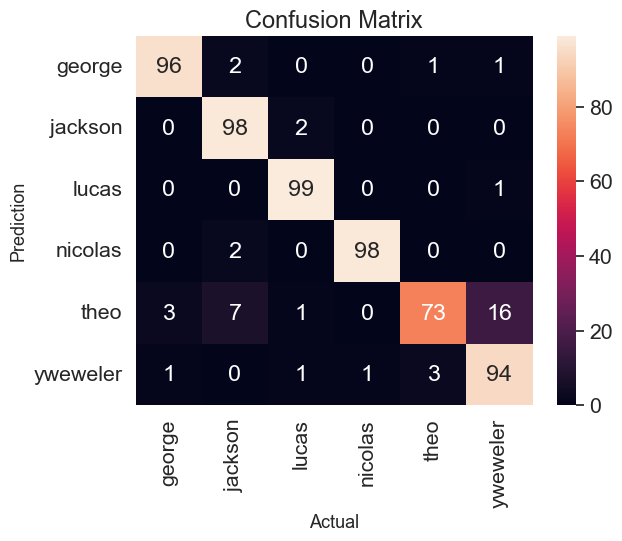

Class george:
Precision: 0.96
Recall: 0.96
F1 Score: 0.96

Class jackson:
Precision: 0.8990825688073395
Recall: 0.98
F1 Score: 0.937799043062201

Class lucas:
Precision: 0.9611650485436893
Recall: 0.99
F1 Score: 0.9753694581280788

Class nicolas:
Precision: 0.98989898989899
Recall: 0.98
F1 Score: 0.9849246231155778

Class theo:
Precision: 0.948051948051948
Recall: 0.73
F1 Score: 0.824858757062147

Class yweweler:
Precision: 0.8392857142857143
Recall: 0.94
F1 Score: 0.8867924528301886

Accuracy: 0.93


In [68]:
speakers_real_labels = []
speakers_predicted_labels = []

predict(t_list, speakers_real_labels, speakers_predicted_labels, speakers)

cmm = make_confusion_mat(speakers_real_labels, speakers_predicted_labels)

pr, rl, f, acc = calculate_metrics(cmm)
for i in range(len(pr)):
    print(f"Class {speakers[i]}:")
    print(f"Precision: {pr[i]}")
    print(f"Recall: {rl[i]}")
    print(f"F1 Score: {f[i]}")
    print()

print("Accuracy:", acc)

# Evaluatoin and Analysis
There are many criteria to measure and evaluate the performance of models. For example: F1-Score, Recall, Precision, Accuracy and ...

### Q1. Research each of the above criteria and explain how each is calculated.
- **`Confusion Matrix`**: A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying the number of accurate and inaccurate instances based on the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. 
The matrix displays the number of instances produced by the model on the test data.
    - True positives (TP): occur when the model accurately predicts a positive data point.
    - True negatives (TN): occur when the model accurately predicts a negative data point.
    - False positives (FP): occur when the model predicts a positive data point incorrectly.
    - False negatives (FN): occur when the model mispredicts a negative data point.
  
What we desire is `TRUE POSITIVE` and `TRUE NEGATIVE` but due to the misclassifications, we may also end up in `FALSE POSITIVE` and `FALSE NEGATIVE`. This is because no machine learning algorithm is perfect.

- **`Why do we need a Confusion Matrix?`**
When assessing a classification model’s performance, a confusion matrix is essential. It offers a thorough analysis of true positive, true negative, false positive, and false negative predictions, facilitating a more profound comprehension of a model’s `recall`, `accuracy`, `precision`, `F1-Score`, and overall effectiveness in class distinction. When there is an uneven class distribution in a dataset, this matrix is especially helpful in evaluating a model’s performance beyond basic accuracy metrics.

#### Metrics based on Confusion Matrix Data
1. **`Accuracy`**: Accuracy represents the number of correctly classified data instances over the total number of data instances. Here is the formula: 
$$( \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} )$$

2. **`Precision`**: Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model. Here is the formula: 
$$( \text{Precision} = \frac{TP}{TP + FP} )$$

3. **`Recall`**: Recall, also known as sensitivity, measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.
This metric is particularly important when the cost of a false negative is high. Here is the formula: 
$$( \text{Recall} = \frac{TP}{TP + FN} )$$

4. **`F1-Score`**: F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall. It’s particularly useful when you need to take both false positives and false negatives into account. The F1 score is maximized when precision and recall are both high, therefore it is handy when we need to find a balance between precision and recall.
   $$( \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} )$$

#### Some more details
**`Is accuracy the best measure?`** **`Accuracy`** may not be a good measure if the dataset is not balanced (both negative and positive classes have different number of data instances). We will explain this with an example. Consider the following scenario: There are 90 people who are healthy (negative) and 10 people who have some disease (positive). Now let’s say our machine learning model perfectly classified the 90 people as healthy but it also classified the unhealthy people as healthy. What will happen in this scenario? In this example, TN = 90, FP = 0, FN = 10 and TP = 0.
Accuracy in this case will be (90 + 0)/(100) = 0.9 and in percentage the accuracy is 90%.

**`Is there anything fishy?`**
The accuracy, in this case, is 90 % but this model is very poor because all the 10 people who are unhealthy are classified as healthy. By this example what we are trying to say is that accuracy is not a good metric when the data set is unbalanced. Using accuracy in such scenarios can result in misleading interpretation of results. Now we will find the **`Precision`** (positive predictive value) in classifying the data instances.

**`What does precision mean?`**
**`Precision`** should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want). Now we will introduce another important metric called Recall. **`Recall`** is also known as sensitivity or true positive rate.

**`Recall`** should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero. As FN increases the value of denominator becomes greater than the numerator and recall value decreases (which we don’t want).
So ideally in a good classifier, we want both precision and recall to be one which also means FP and FN are zero. Therefore we need a metric that takes into account both precision and recall. **`F1-score`** is a metric which takes into account both precision and recall.

**`F1-score`** becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

### Q2. Is there a challenge in calculating the mentioned criteria for this project which is multi-class? If yes, what solution do you have for it?
Multi-class classification is a common machine learning task where you need to assign one of several possible labels to an input. There a little maybe :) difficulty in making confusion matrix because there are 10 labels for speakers. and calculating accuracy, F1 and ... maybe difficult. But at all, They can be solved and their code can be written.




### Q3. Explain how each of the criteria evaluates the model.
- In Conclusion:
  - Accuracy evaluates the overall correctness across all classes.
  - Precision evaluates how reliable a model is when it predicts a positive result.
  - Recall evaluates how well the model captures all relevant instances.
  - F1 Score evaluates the balance between precision and recall in a single value.

### Q4. Decribe differenccess between Precision and Recall.
Often, we think that precision and recall both indicate accuracy of the model. While that is somewhat true, there is a deeper, distinct meaning of each of these terms. Precision means the percentage of your results which are relevant. On the other hand, recall refers to the percentage of total relevant results correctly classified by your algorithm. \
In fact, If you have to recall everything, you will have to keep generating results which are not accurate, hence lowering your precision.

#### **`Precision`**
- Precision measures the accuracy of the positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many are actually positive?"
- Precision focuses on the relevance of the positive predictions. It assesses the ability of the model to avoid false positives.
- Precision is calculated as the ratio of true positives to the sum of true positives and false positives:
- A high precision indicates that the model has a low false positive rate, meaning that when it predicts an instance as positive, it is likely to be correct.

#### **`Recall`**
- Recall measures the ability of the model to capture all the positive instances in the dataset. It answers the question: "Of all the actual positive instances, how many were predicted as positive?"
- Recall focuses on the completeness of the positive predictions. It assesses the ability of the model to avoid false negatives.
- A high recall indicates that the model has a low false negative rate, meaning that it can capture a large proportion of the positive instances in the dataset.

**`example`** \
"One fine morning, Jack got a phone call. It was a stranger on the line. Jack, still sipping his freshly brewed morning coffee, was barely in a position to understand what was coming for him. The stranger said, “Congratulations Jack! You have won a lottery of $10 Million! I just need you to provide me your bank account details, and the money will be deposited in your bank account right way…”"

Assuming Jack is a normal guy, he would think of this as a prank, or maybe, a scam to fetch his bank details, and hence will deny to provide any information. However, this decision is based on his assumption that the call was a hoax. If he is right, he will save the money in his bank account. But, if he is wrong, this decision would cost him a million dollars! \
The null hypothesis in this case is that this call is a hoax. As a matter of fact, if Jack would have believed the stranger and provided his bank details, and the call was in fact a hoax, he would have committed a type I error, also known as a false positive. On the other hand, had he ignored the stranger's request, but later found out that he actually had won the lottery and the call was not a hoax, he would have committed a Type II error, or a false negative. \
continue example: \
"…Feeling a bit panicky, Jack called up his bank to ensure his existing accounts were safe and all his credits were secure. After listening to Jack’s story, the bank executive informed Jack that all his accounts were safe. However, in order to ensure that there is no future risk, the bank manager asked Jack to recall all instances in the last six months wherein he might have shared his account details with another person for any kind of transaction, or may have accessed his online account from a public system, etc…"
What are the chances that Jack will be able to recall all such instances precisely? if Jack had let’s say ten such instances in reality, and he narrated twenty instances to finally spell out the ten correct instances, then his recall will be a 100%, but his precision will only be 50%.

**`conclusion`** \
In summary, precision measures the accuracy of positive predictions, while recall measures the completeness of positive predictions. Both metrics are important and should be considered together to assess the overall performance of a classification model.

### Q5. What kind of averaging does the F1-score criterion use? What is the difference between this type of averaging and normal averaging and why is it important here?
The F1-score criterion typically uses harmonic averaging. Harmonic averaging is used to compute the average of values when dealing with rates or ratios, such as precision and recall, where we are interested in balancing the impact of extreme values. \
This type of averaging differs from the usual arithmetic averaging in that it gives more weight to smaller values. In other words, harmonic averaging penalizes extreme values more than arithmetic averaging does. \
The use of harmonic averaging in the F1-score is important because it provides a balanced measure of precision and recall. Since precision and recall are both equally important in evaluating the performance of a classification model, we want a metric that gives equal weight to both. The harmonic mean ensures that a high score in either precision or recall will not compensate for a low score in the other. As a result, the F1-score provides a more balanced assessment of a model's performance compared to metrics that use arithmetic averaging.


### Q7. Investigate the differences between the results of Q6 and Q7 and specify them.
The differences may be because of different approches in writting the code and using the library. Maybe in implementing hmm libraries ,the authors of it consider some usefull things like optimising some codes, do some preprocess on dataset and .... The main difference is about different ways of writting codes of them!

In [75]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                alpha[:, t] = np.multiply(self.initial_prob.flatten(), observation_matrix[:, t])
            else:
                alpha[:, t] = np.multiply(self._normalize(np.dot(self.transition_matrix.T, alpha[:, t-1])), observation_matrix[:, t])

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.transition_matrix, np.multiply(beta[:, t+1], observation_matrix[:, t+1]))
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = self._multivariate_normal_pdf(obs, self.mean[:, s], self.covariances[:, :, s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _multivariate_normal_pdf(self, x, mean, cov):
        d = x.shape[0]
        diff = x - mean[:, np.newaxis]
        exponent = -0.5 * np.sum(np.linalg.solve(cov, diff) * diff, axis=0)
        coef = (2 * np.pi) ** (-0.5 * d) * np.linalg.det(cov) ** -0.5
        return coef * np.exp(exponent)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            partial_sum = np.multiply(np.dot(self.transition_matrix, np.multiply(alpha[:, t], beta[:, t+1])), B[:, t+1])
            xi_sum += self._normalize(partial_sum)
            partial_g = np.multiply(alpha[:, t], beta[:, t])
            gamma[:, t] = self._normalize(partial_g)
        partial_g = np.multiply(alpha[:, -1], beta[:, -1])
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = xi_sum / np.sum(xi_sum, axis=1)[:, np.newaxis]

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=5):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood

#### Number Speech Rocognition

In [76]:
def train_hmm_from_scratch(classs, lst, Identifier, hmm_models_scratch):
    train_size = int(80 * len(lst[Identifier]) / 100)
    for ind in classs:
        hmm = HMM(num_hidden_states=6)
        random.shuffle(lst[ind])
        concat_train = np.vstack(lst[ind][0:train_size]).T
        hmm.train(concat_train)
        hmm_models_scratch[ind] = hmm
    return hmm_models_scratch

In [84]:
hmm_models_scratch_for_numbers = {}
hmm_models_scratch_for_numbers = train_hmm_from_scratch(numbers, numbers_lists_trans, numbers[0], hmm_models_scratch_for_numbers)

In [85]:
hmm_models_scratch_for_numbers

{'0': <__main__.HMM at 0x1b62c3e1270>,
 '1': <__main__.HMM at 0x1b658691ba0>,
 '2': <__main__.HMM at 0x1b64d5b67a0>,
 '3': <__main__.HMM at 0x1b6586b5d80>,
 '4': <__main__.HMM at 0x1b6586f13f0>,
 '5': <__main__.HMM at 0x1b62c3e1120>,
 '6': <__main__.HMM at 0x1b62c3e16f0>,
 '7': <__main__.HMM at 0x1b62c3e11b0>,
 '8': <__main__.HMM at 0x1b62c3e1210>,
 '9': <__main__.HMM at 0x1b62c3e1480>}

In [86]:
def eval_hmm_from_scratch(classs, lst, Identifier, real_labels_scratch, pred_labels_scratch, hmm_models_scratch):
    train_size = int(80 * len(lst[Identifier]) / 100)
    for ind in classs:
        data_list = lst[ind][train_size:]

        for data in data_list:
            scores = {g: hmm_models_scratch[g].score(data.T) for g in classs}
            predicted_num = max(scores, key=scores.get)
            pred_labels_scratch.append(predicted_num)
            real_labels_scratch.append(ind)

In [87]:
numbers_real_labels_from_scratch = []
numbers_predicted_labels_from_scratch = []
eval_hmm_from_scratch(numbers, numbers_lists_trans, numbers[0], numbers_real_labels_from_scratch, numbers_predicted_labels_from_scratch, hmm_models_scratch_for_numbers)

In [88]:
def make_confusion_matrix_from_scratch(num_classes, true_labels, predicted_labels):
    cm_scratch = np.zeros((num_classes, num_classes), dtype=int)
    
    for pred_label, true_label in zip(predicted_labels, true_labels):
        cm_scratch[int(true_label)][int(pred_label)] += 1

    
    sns.set(font_scale=1.4) 
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_scratch, annot=True, fmt="g", xticklabels=numbers, yticklabels=numbers)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return cm_scratch

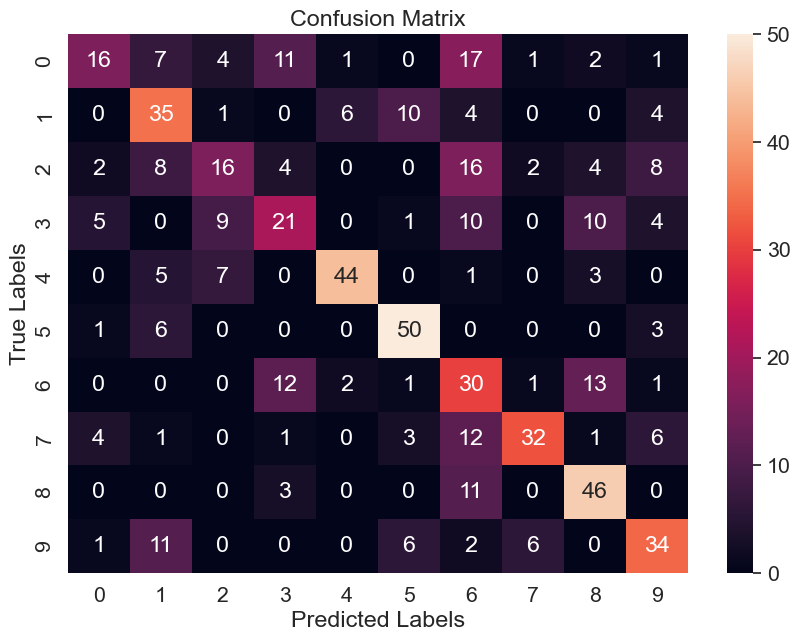

In [89]:
cm_scratch = make_confusion_matrix_from_scratch(10, numbers_real_labels_from_scratch, numbers_predicted_labels_from_scratch)

In [90]:
precision_scratch, recall_scratch, f1_score_scratch, accuracy_scratch = calculate_metrics(cm_scratch)
for i in range(len(precision_scratch)):
    print(f"Class {i}:")
    print(f"Precision: {precision_scratch[i]}")
    print(f"Recall: {recall_scratch[i]}")
    print(f"F1 Score: {f1_score_scratch[i]}")
    print()

print("Accuracy:", accuracy_scratch)

Class 0:
Precision: 0.5517241379310345
Recall: 0.26666666666666666
F1 Score: 0.35955056179775285

Class 1:
Precision: 0.4794520547945205
Recall: 0.5833333333333334
F1 Score: 0.5263157894736842

Class 2:
Precision: 0.43243243243243246
Recall: 0.26666666666666666
F1 Score: 0.3298969072164949

Class 3:
Precision: 0.40384615384615385
Recall: 0.35
F1 Score: 0.375

Class 4:
Precision: 0.8301886792452831
Recall: 0.7333333333333333
F1 Score: 0.7787610619469026

Class 5:
Precision: 0.704225352112676
Recall: 0.8333333333333334
F1 Score: 0.7633587786259541

Class 6:
Precision: 0.2912621359223301
Recall: 0.5
F1 Score: 0.36809815950920244

Class 7:
Precision: 0.7619047619047619
Recall: 0.5333333333333333
F1 Score: 0.6274509803921569

Class 8:
Precision: 0.5822784810126582
Recall: 0.7666666666666667
F1 Score: 0.6618705035971223

Class 9:
Precision: 0.5573770491803278
Recall: 0.5666666666666667
F1 Score: 0.5619834710743801

Accuracy: 0.54


#### Speaker Speech Rocognition

In [91]:
hmm_models_scratch_for_speakers = {}
hmm_models_scratch_for_speakers = train_hmm_from_scratch(speakers, speakers_list_trans, speakers[0], hmm_models_scratch_for_speakers)

In [92]:
speakers_predicted_labels_from_scratch = []
speakers_real_labels_from_scratch = []
eval_hmm_from_scratch(speakers, speakers_list_trans, speakers[0], speakers_real_labels_from_scratch, speakers_predicted_labels_from_scratch, hmm_models_scratch_for_speakers)

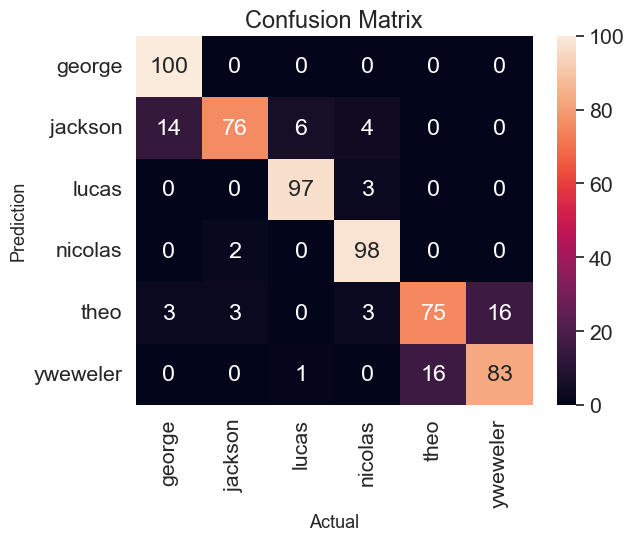

In [93]:
cm_scratch_speakers = make_confusion_mat(speakers_real_labels_from_scratch, speakers_predicted_labels_from_scratch)

In [94]:
precision_scratch_speakers, recall_scratch_speakers, f1_score_scratch_speakers, accuracy_scratch_speakers = calculate_metrics(cm_scratch_speakers)
for i in range(len(precision_scratch_speakers)):
    print(f"Class {speakers[i]}:")
    print(f"Precision: {precision_scratch_speakers[i]}")
    print(f"Recall: {recall_scratch_speakers[i]}")
    print(f"F1 Score: {f1_score_scratch_speakers[i]}")
    print()

print("Accuracy:", accuracy_scratch_speakers)

Class george:
Precision: 0.8547008547008547
Recall: 1.0
F1 Score: 0.9216589861751151

Class jackson:
Precision: 0.9382716049382716
Recall: 0.76
F1 Score: 0.8397790055248618

Class lucas:
Precision: 0.9326923076923077
Recall: 0.97
F1 Score: 0.9509803921568627

Class nicolas:
Precision: 0.9074074074074074
Recall: 0.98
F1 Score: 0.9423076923076924

Class theo:
Precision: 0.8241758241758241
Recall: 0.75
F1 Score: 0.7853403141361257

Class yweweler:
Precision: 0.8383838383838383
Recall: 0.83
F1 Score: 0.8341708542713568

Accuracy: 0.8816666666666667


### resources
https://medium.com/@tanveer9812/mfccs-made-easy-7ef383006040 \
https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd \
https://python.plainenglish.io/audio-segmentation-and-artificial-intelligence-a-harmonious-symphony-f472dd770b97 \
https://towardsdatascience.com/how-i-understood-what-features-to-consider-while-training-audio-files-eedfb6e9002b \
https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53 \
https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53 \
https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488 \
https://www.youtube.com/watch?v=3gzI4Z2OFgY&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0 \
https://www.youtube.com/watch?v=ZqpSb5p1xQo \
https://www.youtube.com/watch?v=Gka11q5VfFI \
https://www.youtube.com/watch?v=NDY2fH1FitQ&list=PL8hTotro6aVHehW7F5wZvqb7K8cceYb49 \
https://www.youtube.com/watch?v=n2FKsPt83_A \
https://www.youtube.com/watch?v=qXWRL6NHlWc&list=PL8yHsr3EFj537_iYA5QrvwhvMlpkJ1yGN \
https://www.youtube.com/watch?v=wdKldF_g_ow&list=PLAoS0B7BMhxDDEw9mwg4-RQOwjZtUv_gt \
https://dev.to/highcenburg/suppressing-audio-with-python-16o4 \
ChatGPT :) \
and lots of usefull websites